# Homework 5
**Student name:** Juliya Anuash

**Group:** BDA-1903

### Description

The goal of this scraping is to analyze apartments from my city. The data was scraped from "krisha.kz" site (https://krisha.kz/). Here we can see the freshest advertisements. For realisation of this scraping we used Selenium library.

Below names of columns that we will use for our analysis:

- name	- the name of the advertisement
- location - the location of the apartment
- author - an author of the advertisement
- phone_number - a phone number of an author
- room - quantity of rooms
- area - area of the apartment
- floor - a floor where apartment is located
- street - a street where apartment is located


In [1]:
# In the beginning Install the library
!pip install selenium

In [1]:
from selenium import webdriver
#from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from time import sleep
import random
from selenium.webdriver.support.select import Select
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
driver = webdriver.Chrome(executable_path = r'D:\Program Files\ChromeDriver\chromedriver.exe') #opening the chrome

In [41]:
driver.maximize_window() #maximizing the chrome window

In [42]:
#going to the krisha.kz web site
driver.get('https://krisha.kz')

In [45]:
region = driver.find_element_by_xpath("//a[@id='region-selected-value']") #findung the tag where we can choose the region
region.click() #opening selection
oblast = Select(driver.find_element_by_xpath("//select[@data-level='2']")) #selecting appropriate region
oblast.select_by_visible_text("Карагандинская обл.")

In [46]:
city = Select(driver.find_element_by_xpath("//select[@data-level='3']")) #selecting appropriate city
city.select_by_visible_text("Жезказган")
sleep(0.1)
search_button = driver.find_element_by_xpath(".//a[@class='btn btn-primary region-dropdown-action region-dropdown-action-apply']")
search_button.click() #clicking the "выбрать" button

In [47]:
search_button = driver.find_element_by_xpath(".//button[@class='search-btn-main']")
search_button.click() #clicking the "найти" button

In [48]:
pages = driver.find_elements_by_xpath('.//nav[@class="paginator"]') #finding a tag where pages are located
pages_links = [] #creating a new list to save links of pages
for page in pages:
    link = page.find_elements_by_tag_name('a') #finding "a" tags of pages
    for l in link:
        page_link = l.get_attribute('href') #finding links of pages
    #print(link)
        pages_links.append(page_link) #adding links to the list
pages_links[:5] #printing first 5 links of pages

['https://krisha.kz/prodazha/kvartiry/zhezkazgan/',
 'https://krisha.kz/prodazha/kvartiry/zhezkazgan/?page=2',
 'https://krisha.kz/prodazha/kvartiry/zhezkazgan/?page=3',
 'https://krisha.kz/prodazha/kvartiry/zhezkazgan/?page=4',
 'https://krisha.kz/prodazha/kvartiry/zhezkazgan/?page=5']

In [53]:
apartment_links = [] #creating new list to save the link of each apartment
for page in pages_links[:1]:
    driver.get(page) #opening each page
    apartments = driver.find_elements_by_xpath('.//div[@class="a-card__inc"]')#finding all apartments in the page
    for apartment in apartments:
        apart_id = apartment.find_element_by_tag_name('a') #finding all "a" tags
        a = apart_id.get_attribute('href') #finding all links
        apartment_links.append(a) #adding links to the list
        #print(a)
apartment_links

['https://krisha.kz/a/show/664556507',
 'https://krisha.kz/a/show/664612359',
 'https://krisha.kz/a/show/663416045',
 'https://krisha.kz/a/show/664591650',
 'https://krisha.kz/a/show/664620964',
 'https://krisha.kz/a/show/664505637',
 'https://krisha.kz/a/show/664613429',
 'https://krisha.kz/a/show/663749874',
 'https://krisha.kz/a/show/661963263',
 'https://krisha.kz/a/show/664057846',
 'https://krisha.kz/a/show/51376376',
 'https://krisha.kz/a/show/664329306',
 'https://krisha.kz/a/show/664467896',
 'https://krisha.kz/a/show/56904581',
 'https://krisha.kz/a/show/55496200',
 'https://krisha.kz/a/show/662542706',
 'https://krisha.kz/a/show/664624483',
 'https://krisha.kz/a/show/662793159',
 'https://krisha.kz/a/show/664327882',
 'https://krisha.kz/a/show/58274820']

In [60]:
len(apartment_links) #printing the total number of apartments

20

In [57]:
apartment_details = [] #creating a new list to save information about an apartment
for link in apartment_links:
    driver.get(link)#opening all linnks from the list
    name = driver.find_element_by_tag_name('h1') #finding the name of apartmnet
    city = driver.find_element_by_xpath('.//div[@class="offer__location offer__advert-short-info"]') #finding the location of an apartment
    city = city.find_element_by_tag_name('span')
    author = driver.find_elements_by_xpath('.//div[@class="owners__name owners__name--large"]')[0] #finding an author of an advertisement
    phone_button = driver.find_element_by_xpath(".//span[@class='show-phones']") #clicking the "показать телефон" button
    phone_button.click()
    number = driver.find_elements_by_xpath('.//div[@class="offer__contacts-loaded"]')[0]
    number = number.find_element_by_tag_name('div')#finding the phone number
    apart_info = [name.text, city.text, author.text, number.text.replace('\n', ' ')] #collecting all information together
    apartment_details.append(apart_info) #adding collected data to the list
apartment_details

[['3-комнатная квартира, 64 м², 3/5 этаж, Расковой',
  'Жезказган, Карагандинская обл.',
  'Хозяин недвижимости',
  '+7 705 192 5841'],
 ['3-комнатная квартира, 63 м², 1/5 этаж, улица Есенберлина 15 - 4кв',
  'Жезказган, Карагандинская обл.',
  'Хозяин недвижимости',
  '+7 771 527 4641'],
 ['2-комнатная квартира, 45 м², 2/4 этаж, Гагарина 16',
  'Жезказган, Карагандинская обл.',
  'Хозяин недвижимости',
  '+7 705 982 1141'],
 ['3-комнатная квартира, 62.2 м², 3/5 этаж, Женис 17',
  'Жезказган, Карагандинская обл.',
  'Хозяин недвижимости',
  '+7 778 847 2747'],
 ['3-комнатная квартира, 62 м², 1/5 этаж, улица Сейфуллина 63',
  'Жезказган, Карагандинская обл.',
  'Хозяин недвижимости',
  '+7 777 575 3253'],
 ['2-комнатная квартира, 59 м², 3/6 этаж, Гоголя 14',
  'Жезказган, Карагандинская обл.',
  'Хозяин недвижимости',
  '+7 747 176 1355'],
 ['5-комнатная квартира, 138 м², 5/5 этаж, Гагарина 72 — Маяковский',
  'Жезказган, Карагандинская обл.',
  'Хозяин недвижимости',
  '+7 707 605 7463

#### Importing data to the excel file.

In [83]:
apartment_df = pd.DataFrame(apartment_details) #creating a dataframe
apartment_df.columns = ['name', 'location', 'author', 'phone_number'] #creating columns
apartment_df

,name,location,author,phone_number
0,"3-комнатная квартира, 64 м², 3/5 этаж, Расковой","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 192 5841
1,"3-комнатная квартира, 63 м², 1/5 этаж, улица Е...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 771 527 4641
2,"2-комнатная квартира, 45 м², 2/4 этаж, Гагарин...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 982 1141
3,"3-комнатная квартира, 62.2 м², 3/5 этаж, Женис 17","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 778 847 2747
4,"3-комнатная квартира, 62 м², 1/5 этаж, улица С...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 777 575 3253
5,"2-комнатная квартира, 59 м², 3/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 747 176 1355
6,"5-комнатная квартира, 138 м², 5/5 этаж, Гагари...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 707 605 7463 +7 707 108 1810
7,"3-комнатная квартира, 71 м², 1/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 776 579 2266
8,"2-комнатная квартира, 55.5 м², 5/5 этаж, 9-й к...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 827 5785
9,"2-комнатная квартира, 44 м², 4/5 этаж, Сатпаев...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 701 197 9555


In [84]:
apartment_df[['room','area', 'floor', 'street']] = apartment_df.name.str.split(", ",expand=True,) #dividing the "name" column into 4 columns
apartment_df

,name,location,author,phone_number,room,area,floor,street
0,"3-комнатная квартира, 64 м², 3/5 этаж, Расковой","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 192 5841,3-комнатная квартира,64 м²,3/5 этаж,Расковой
1,"3-комнатная квартира, 63 м², 1/5 этаж, улица Е...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 771 527 4641,3-комнатная квартира,63 м²,1/5 этаж,улица Есенберлина 15 - 4кв
2,"2-комнатная квартира, 45 м², 2/4 этаж, Гагарин...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 982 1141,2-комнатная квартира,45 м²,2/4 этаж,Гагарина 16
3,"3-комнатная квартира, 62.2 м², 3/5 этаж, Женис 17","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 778 847 2747,3-комнатная квартира,62.2 м²,3/5 этаж,Женис 17
4,"3-комнатная квартира, 62 м², 1/5 этаж, улица С...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 777 575 3253,3-комнатная квартира,62 м²,1/5 этаж,улица Сейфуллина 63
5,"2-комнатная квартира, 59 м², 3/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 747 176 1355,2-комнатная квартира,59 м²,3/6 этаж,Гоголя 14
6,"5-комнатная квартира, 138 м², 5/5 этаж, Гагари...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 707 605 7463 +7 707 108 1810,5-комнатная квартира,138 м²,5/5 этаж,Гагарина 72 — Маяковский
7,"3-комнатная квартира, 71 м², 1/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 776 579 2266,3-комнатная квартира,71 м²,1/6 этаж,Гоголя 14
8,"2-комнатная квартира, 55.5 м², 5/5 этаж, 9-й к...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 827 5785,2-комнатная квартира,55.5 м²,5/5 этаж,"9-й квартал 91 — Абая ,гоголя"
9,"2-комнатная квартира, 44 м², 4/5 этаж, Сатпаев...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 701 197 9555,2-комнатная квартира,44 м²,4/5 этаж,Сатпаева 52


In [85]:
apartment_df[['room','room1']] = apartment_df.room.str.split("-",expand=True,) #dividing columns to leave only numbers
apartment_df[['area', 'area1']] = apartment_df.area.str.split(" ",expand=True,)
apartment_df[['floor', 'floor1']] = apartment_df.floor.str.split("/",expand=True,)
apartment_df

,name,location,author,phone_number,room,area,floor,street,room1,area1,floor1
0,"3-комнатная квартира, 64 м², 3/5 этаж, Расковой","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 192 5841,3,64,3,Расковой,комнатная квартира,м²,5 этаж
1,"3-комнатная квартира, 63 м², 1/5 этаж, улица Е...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 771 527 4641,3,63,1,улица Есенберлина 15 - 4кв,комнатная квартира,м²,5 этаж
2,"2-комнатная квартира, 45 м², 2/4 этаж, Гагарин...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 982 1141,2,45,2,Гагарина 16,комнатная квартира,м²,4 этаж
3,"3-комнатная квартира, 62.2 м², 3/5 этаж, Женис 17","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 778 847 2747,3,62.2,3,Женис 17,комнатная квартира,м²,5 этаж
4,"3-комнатная квартира, 62 м², 1/5 этаж, улица С...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 777 575 3253,3,62,1,улица Сейфуллина 63,комнатная квартира,м²,5 этаж
5,"2-комнатная квартира, 59 м², 3/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 747 176 1355,2,59,3,Гоголя 14,комнатная квартира,м²,6 этаж
6,"5-комнатная квартира, 138 м², 5/5 этаж, Гагари...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 707 605 7463 +7 707 108 1810,5,138,5,Гагарина 72 — Маяковский,комнатная квартира,м²,5 этаж
7,"3-комнатная квартира, 71 м², 1/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 776 579 2266,3,71,1,Гоголя 14,комнатная квартира,м²,6 этаж
8,"2-комнатная квартира, 55.5 м², 5/5 этаж, 9-й к...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 827 5785,2,55.5,5,"9-й квартал 91 — Абая ,гоголя",комнатная квартира,м²,5 этаж
9,"2-комнатная квартира, 44 м², 4/5 этаж, Сатпаев...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 701 197 9555,2,44,4,Сатпаева 52,комнатная квартира,м²,5 этаж


In [86]:
apartment_df.drop(['room1', 'area1', 'floor1'], axis='columns', inplace=True) #drop useless columns
apartment_df

,name,location,author,phone_number,room,area,floor,street
0,"3-комнатная квартира, 64 м², 3/5 этаж, Расковой","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 192 5841,3,64,3,Расковой
1,"3-комнатная квартира, 63 м², 1/5 этаж, улица Е...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 771 527 4641,3,63,1,улица Есенберлина 15 - 4кв
2,"2-комнатная квартира, 45 м², 2/4 этаж, Гагарин...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 982 1141,2,45,2,Гагарина 16
3,"3-комнатная квартира, 62.2 м², 3/5 этаж, Женис 17","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 778 847 2747,3,62.2,3,Женис 17
4,"3-комнатная квартира, 62 м², 1/5 этаж, улица С...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 777 575 3253,3,62,1,улица Сейфуллина 63
5,"2-комнатная квартира, 59 м², 3/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 747 176 1355,2,59,3,Гоголя 14
6,"5-комнатная квартира, 138 м², 5/5 этаж, Гагари...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 707 605 7463 +7 707 108 1810,5,138,5,Гагарина 72 — Маяковский
7,"3-комнатная квартира, 71 м², 1/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 776 579 2266,3,71,1,Гоголя 14
8,"2-комнатная квартира, 55.5 м², 5/5 этаж, 9-й к...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 827 5785,2,55.5,5,"9-й квартал 91 — Абая ,гоголя"
9,"2-комнатная квартира, 44 м², 4/5 этаж, Сатпаев...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 701 197 9555,2,44,4,Сатпаева 52


In [87]:
apartment_df.to_excel('apartment_details_Juliya_Anuash_BDA1903.xlsx', index=False) #importing dataframe to the excel file

In [2]:
df = pd.read_excel('apartment_details_Juliya_Anuash_BDA1903.xlsx') #reading the excel file
df

,name,location,author,phone_number,room,area,floor,street
0,"3-комнатная квартира, 64 м², 3/5 этаж, Расковой","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 192 5841,3,64.0,3,Расковой
1,"3-комнатная квартира, 63 м², 1/5 этаж, улица Е...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 771 527 4641,3,63.0,1,улица Есенберлина 15 - 4кв
2,"2-комнатная квартира, 45 м², 2/4 этаж, Гагарин...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 982 1141,2,45.0,2,Гагарина 16
3,"3-комнатная квартира, 62.2 м², 3/5 этаж, Женис 17","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 778 847 2747,3,62.2,3,Женис 17
4,"3-комнатная квартира, 62 м², 1/5 этаж, улица С...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 777 575 3253,3,62.0,1,улица Сейфуллина 63
5,"2-комнатная квартира, 59 м², 3/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 747 176 1355,2,59.0,3,Гоголя 14
6,"5-комнатная квартира, 138 м², 5/5 этаж, Гагари...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 707 605 7463 +7 707 108 1810,5,138.0,5,Гагарина 72 — Маяковский
7,"3-комнатная квартира, 71 м², 1/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 776 579 2266,3,71.0,1,Гоголя 14
8,"2-комнатная квартира, 55.5 м², 5/5 этаж, 9-й к...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 827 5785,2,55.5,5,"9-й квартал 91 — Абая ,гоголя"
9,"2-комнатная квартира, 44 м², 4/5 этаж, Сатпаев...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 701 197 9555,2,44.0,4,Сатпаева 52


#### Summary Statistics

In [3]:
len(df) #see the size of observations

20

We have 20 observations

In [4]:
df

,name,location,author,phone_number,room,area,floor,street
0,"3-комнатная квартира, 64 м², 3/5 этаж, Расковой","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 192 5841,3,64.0,3,Расковой
1,"3-комнатная квартира, 63 м², 1/5 этаж, улица Е...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 771 527 4641,3,63.0,1,улица Есенберлина 15 - 4кв
2,"2-комнатная квартира, 45 м², 2/4 этаж, Гагарин...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 982 1141,2,45.0,2,Гагарина 16
3,"3-комнатная квартира, 62.2 м², 3/5 этаж, Женис 17","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 778 847 2747,3,62.2,3,Женис 17
4,"3-комнатная квартира, 62 м², 1/5 этаж, улица С...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 777 575 3253,3,62.0,1,улица Сейфуллина 63
5,"2-комнатная квартира, 59 м², 3/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 747 176 1355,2,59.0,3,Гоголя 14
6,"5-комнатная квартира, 138 м², 5/5 этаж, Гагари...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 707 605 7463 +7 707 108 1810,5,138.0,5,Гагарина 72 — Маяковский
7,"3-комнатная квартира, 71 м², 1/6 этаж, Гоголя 14","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 776 579 2266,3,71.0,1,Гоголя 14
8,"2-комнатная квартира, 55.5 м², 5/5 этаж, 9-й к...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 705 827 5785,2,55.5,5,"9-й квартал 91 — Абая ,гоголя"
9,"2-комнатная квартира, 44 м², 4/5 этаж, Сатпаев...","Жезказган, Карагандинская обл.",Хозяин недвижимости,+7 701 197 9555,2,44.0,4,Сатпаева 52


In [92]:
df['room'].mode() #finding the most frequency quantity of rooms

0    3
dtype: int64

In [93]:
df['area'].mode() #finding the most frequency quantity of area

0    44.0
1    78.0
dtype: float64

In [94]:
df['floor'].mode() #finding the most frequency quantity of floor

0    5
dtype: int64

In [96]:
df['area'].mean() #finding the average number of area

66.66

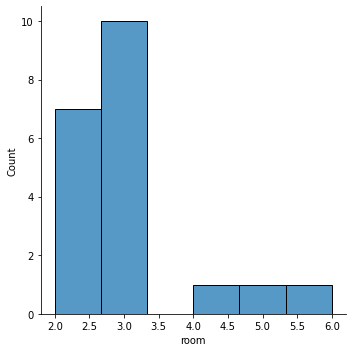

In [104]:
ax = sns.displot(x=df['room']) #plotting histogram to see total number of each room

We see that the most frequency is an apartment that has 3 rooms.

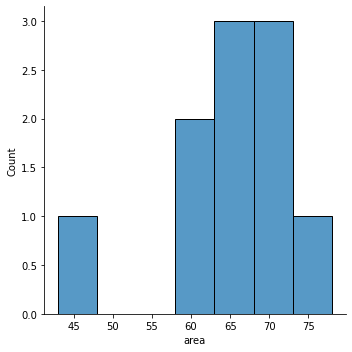

In [108]:
ax = sns.displot(x=df['area'].where(df['room']==3), #plotting histogram to see the most frequency area of 3-room apartment
                binwidth=5)

In most, 3-room apartments have an area of 62.5 - 72.5 $m^2$.

In [123]:
x1 = df['floor'].where(df['floor']==1).count()/len(df['floor']) #finding the percentage of each floor
x2 = df['floor'].where(df['floor']==2).count()/len(df['floor'])
x3 = df['floor'].where(df['floor']==3).count()/len(df['floor'])
x4 = df['floor'].where(df['floor']==4).count()/len(df['floor'])
x5 = df['floor'].where(df['floor']==5).count()/len(df['floor']) 
print(x1, x2, x3, x4, x5)

0.25 0.1 0.25 0.1 0.3


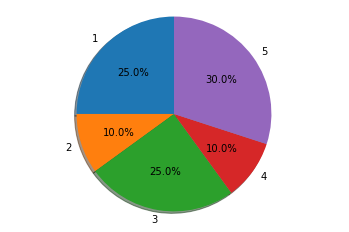

In [124]:
#plotting the pie chart
labels = '1', '2', '3', '4', '5'
sizes = [x1, x2, x3, x4, x5]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We see that big part of apartments are located on 1, 3 and 5 floors.

## Conclusion

In this scraping wee see that in the first page was 20 advertisements. Many of them has 3 rooms and area in the range 62.5 - 67.5 $m^2$. All of them was published by the owner of the apartment. In the most, they are located in the 1, 3 and 5 floors.